# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters: $\sigma$ and $\mu$.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a Simulated Annealing (SA) algorithm.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331761027
2nd excited state energy:  1.971733134393021


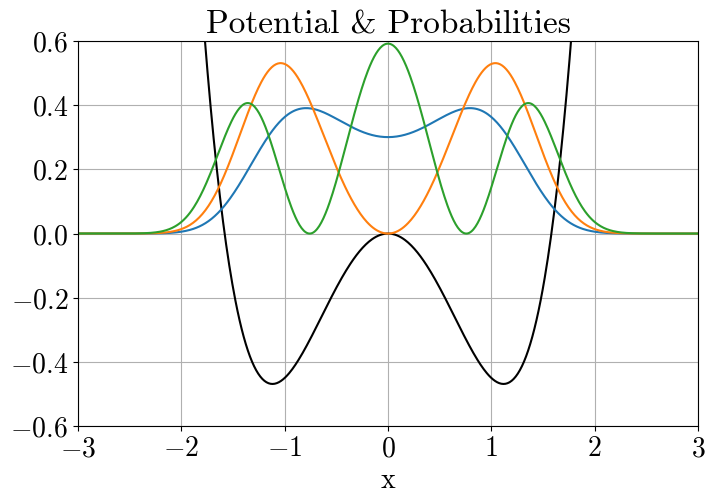

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

----
## Risoluzione
----

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [8.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':20,
    'savefig.directory':'./Images'
})

### Esercizio 8.1
La funzione d'onda $\Psi_T^{\sigma,\mu}(x)$ fornisce, con il suo modulo quadro, una distribuzione di probabilità che può essere facilmente campionata con l'algoritmo di **Metropolis**. Con tale campionamento è possibile quindi valutare, tramite data-blocking, il valore di aspettazione dell'**Hamiltoniana** $\hat{H}$ del sistema calcolando l'integrale:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
Questo calcolo permette quindi la conoscenza dell'autovalore $E_{(\sigma,\mu)}$ della funzione d'onda $\Psi_T^{\sigma,\mu}(x)$. Viene quindi riportato l'andamento della blocking average di tale valore con $\sigma=\mu=1$

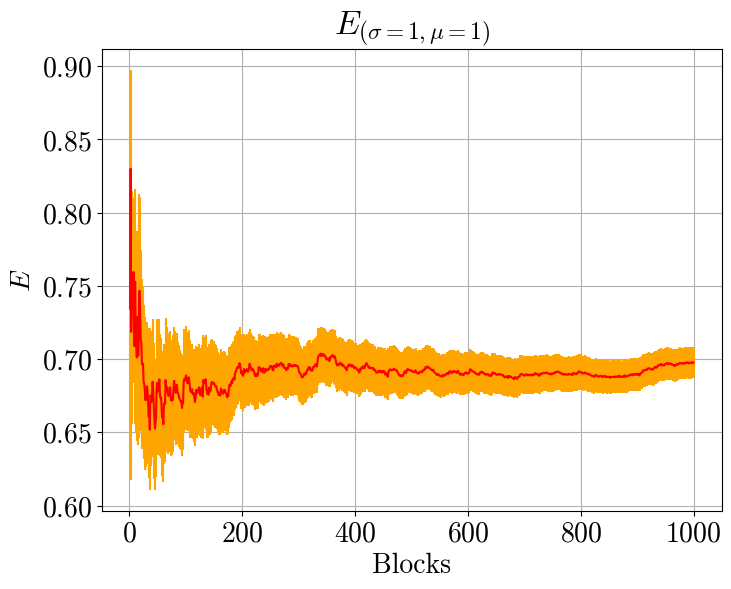

In [29]:
df_unif = pd.read_csv('8.1/unif.txt',sep='\t')
x1=df_unif["BLOCK"]
y1=df_unif["V_AVE"]
err1=df_unif["ERROR"]
plt.errorbar(x1,y1,err1,color='red',ecolor='orange')
plt.title('$E_{(\sigma=1,\mu=1)}$')
plt.ylabel('$E$')
plt.xlabel('Blocks')
plt.grid()
plt.show()

Parametri del plot:
- $10^3$ blocchi da $10^3$ step

### Codice
Per lo svolgimento di questo esercizio ho implementato la classe `energy` figlia della classe `datablocking` che possiede un data-membro `metropolis& _metro` che a sua volta, ricordiamo, possiede un data-membro `funzione& distr` che è anch'essa una classe virtuale di cui è stata implementata, in questo esercizio, la classe figlia `hat` che descrive $|\Psi_T(x)|^2$.

Riporto quindi la quasi totalità del `main.cpp` in cui si manifesta questa struttura di dipendenze tra le classi appena citate:
```cpp
    vec pos = {-1.};
    hat distr(atof(argv[1]),atof(argv[2]));
    string *type;
    type = new string[1];
    type[0] = "unif";
    int L = SetProp("input.txt","NBLOCKS");                 //Numero di blocchi
    int O = SetProp("input.txt","NSTEPS");                  //Numero di passi per blocco
    
    metropolis metro(distr,type[0],"../../Librerie/Random Generator/");
    energy sys(L,O,1,1,type,metro,pos,true);
    
    sys.blocks(true);
```
L'intero svolgimento della simulazione rimane velato nell'ultima riga di codice.
Per togliere un po' di mistero riporto anche il metodo `energy::increase()` che agisce ad ogni blocco di `energy::blocks()`:
```cpp
vec energy::increase(vec pos){
    for(int k=0;k<_nstep;k++){
        pos = _metro.move(pos);
        blk_av(0) += _metro.GetDistr().der(pos);
        if(_prt){
            ofstream fout;
            fout.open("position.txt",ios::app);
            fout<<pos(0)<<endl;
            fout.close();
        }
    }
    return pos;
};
```
Da notare la riga di codice 
```cpp 
blk_av(0) += _metro.GetDistr().der(pos);
```
in cui viene richiamato il metodo `funzione::der(pos)` (delle `funzione distr` membro del `metropolis _metro` a sua volta membro di `energy`) che riporta il valore di $\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$ nel punto $x=$`pos`

### Esercizio 8.2
In  questa seconda parte ci si è posti l'obiettivo di trovare il **Ground State** approssimato dell'Hamilitoniana $\hat{H}$. Approssimato poichè stiamo procedendo con l'ansatz di una funzione d'onda avente una precisa forma funzionale dipendendenta da due parametri $\sigma$ e $\mu$ su cui si va ad agire al fine di minimizzare l'autovalore di energia per detereminare appunto il Ground State. Per fare ciò è stato implementato un algoritmo di **Simulated Annealing** che genera un campionamento dello spazio dei parametri $\sigma$ e $\mu$. Tale campionamento segue nuovamente una algoritmo di **Metropolis** in cui la distribuzione di probabilità campionata è quella di **Boltzmann**:
$$p(\sigma,\mu)=\frac{1}{Z}e^{-\beta E_{(\sigma,\mu)}}$$
La convergenza del Simulated Annealing verso il ground state è guidata da un progressivo **abbassamento della temperatura** (o crescita di $\beta$) che comporta un campionamento sempre più ristretto attorno a un minimo della distribuzione di probabilità  e una difficoltà sempre maggiore di transizione verso stati (coppie $(\sigma,\mu)$) con energia maggiore.

In [16]:
dfb = pd.read_csv('8.2/best.txt',sep='\t')
x = dfb["TEMP"]

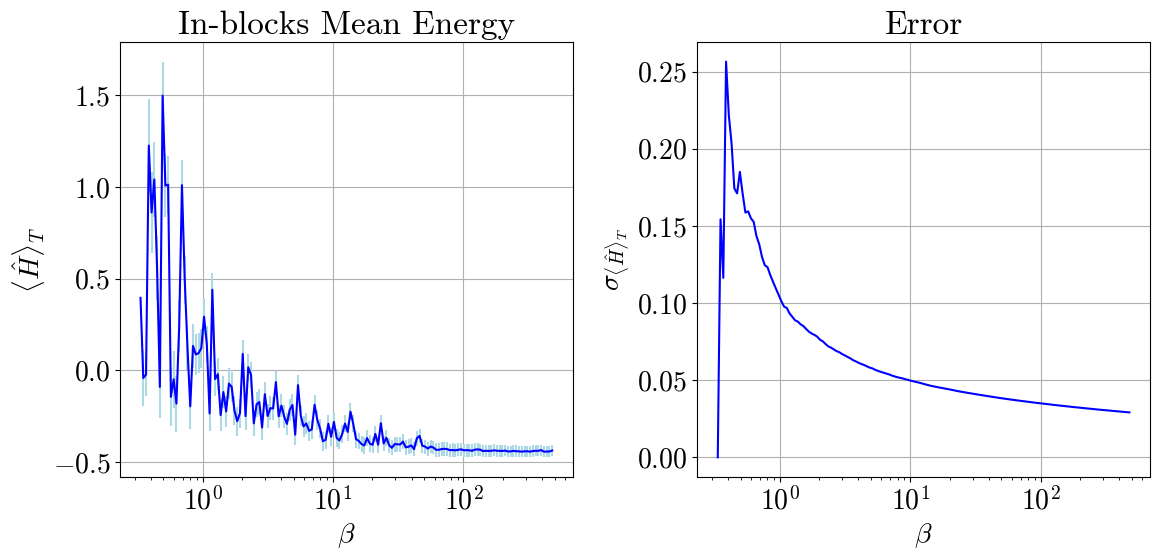

In [17]:
df_e = pd.read_csv('8.2/energy.txt',sep='\t')
y1=df_e["ACTUAL_V"]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
err1=df_e["ERROR"]
plt.errorbar(1/x,y1,err1,color='blue',ecolor='lightblue')
plt.ylabel('$\langle\hat{H}\\rangle_T$')
plt.xscale('log')
plt.xlabel('$\\beta$')
plt.title('In-blocks Mean Energy')
plt.grid()
plt.subplot(1,2,2)
plt.plot(1/x,err1,color='blue')
plt.ylabel('$\sigma_{\langle\hat{H}\\rangle_T}$')
plt.xscale('log')
plt.xlabel('$\\beta$')
plt.title('Error')
plt.grid()
plt.tight_layout()
plt.show()

Nella mia implementazione del Simulated Annealing ho deciso di variare la temperatura a partire da $T^*=3.0$ e divididendo per un fattore $1.05$ alla fine di ciascuno dei $150$ blocchi. Per ciascun valore di temperatura l'algoritmo di Metropolis propone mosse di ampiezza massima pari a $0.1$ nello spazio dei parametri $(\sigma,\mu)$ e la mossa viene accettata secondo la ditribuzione di Boltzmann andando a valutare l'integrale per il calcolo di $E_{(\sigma,\mu)}$ negli stati iniziale e finale. Qui sopra è riportato l'andamento di $\langle\hat{H}\rangle_{T}$ al variare di $\beta$, con la relativa incertezza che si nota diminuire con l'abbassamento della temperatura, frutto di un campionamento sempre meno ampio dello spazio dei parametri.

La convergenza verso il minimo può essere qualitativamente osservata anche osservando l'evoluzione dello stato finale raggiunto per ciascun valore di temperatura

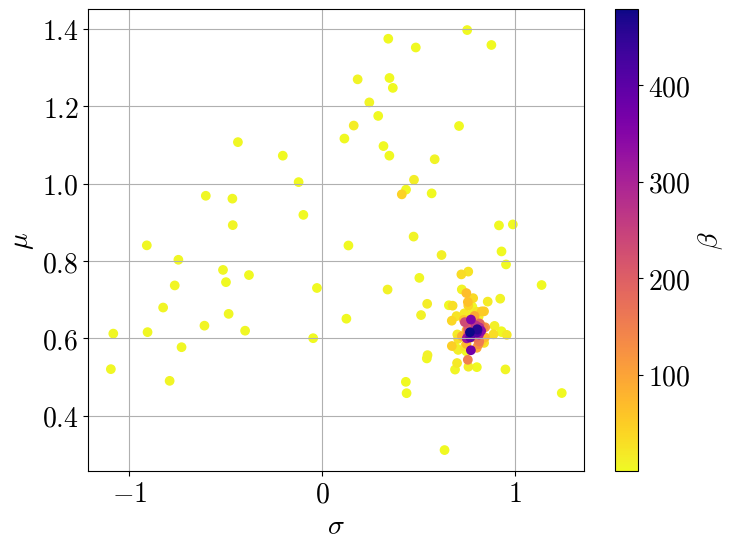

In [18]:
dfs = pd.read_csv('8.2/sigma.txt',sep='\t')
dfm = pd.read_csv('8.2/mu.txt',sep='\t')
s = dfs["ACTUAL_V"]
mu = dfm["ACTUAL_V"]
plt.scatter(s,mu,c=1/x,cmap='plasma_r')
bar = plt.colorbar()
bar.set_label('$\\beta$')
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.grid()
plt.show()

Parametri dei plot:
- $150$ blocchi a partire da  $T^*=3.0$ divisa per $1.05$ ad ogni blocco
- $100$ punti $(\sigma,\mu)$ esplorati per ogni blocco 
- $100$ blocchi da $500$ step per il calcolo di $E$ per ciascun $(\sigma,\mu)$

Viene riportato l'andamento con data-blocking del valore di Energia ottenuto svolgendo la simulazione del'Esercizio 8.1 con i parametri $(\sigma,\mu)_{best}$ trovati in questa seconda parte:
- $\sigma=0.634228$
- $\mu=0.807166$

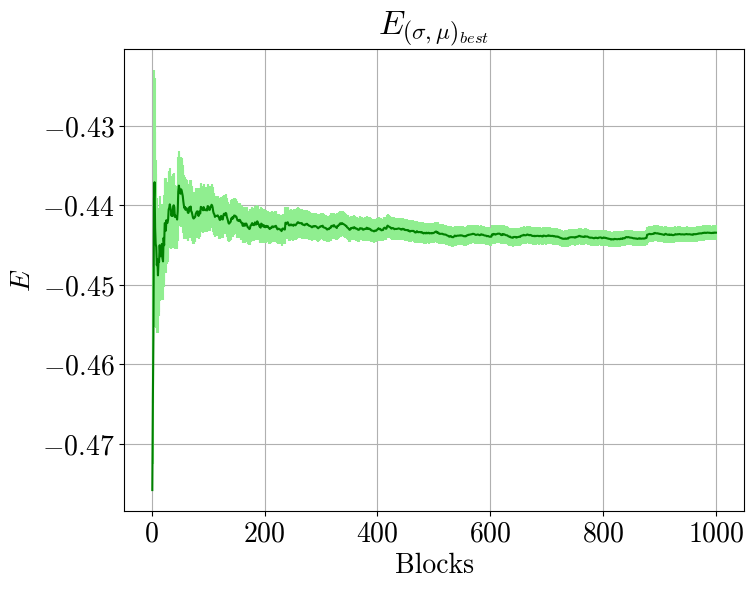

In [28]:
df_unif = pd.read_csv('8.1/best.txt',sep='\t')
x1=df_unif["BLOCK"]
y1=df_unif["V_AVE"]
err1=df_unif["ERROR"]
plt.errorbar(x1,y1,err1,color='g',ecolor='lightgreen')
plt.title('$E_{(\sigma,\mu)_{best}}$')
plt.xlabel('Blocks')
plt.ylabel('$E$')
plt.grid()
plt.show()

Parametri del plot:
- $10^3$ blocchi da $10^3$ step

Contestualmente al calcolo dell'integrale per la stima di $\langle\hat{H}\rangle_{T}$ è stata tenuta traccia anche del campionamento della distribuzione di probabilità in spazio $x$ data da $|\Psi_T(x)|^2$ che può essere confrontata con il valore analitico di $|\Psi_T(x)^{(\sigma,\mu)_{best}}|^2$ e con la funzione ottenuta dalla versione matriciale dell'equazione di Schrödinger. Il campionamento e le due funzioni mostrano tra loro un ottimo accordo

In [20]:
def wave(x,a,b):
    uno = np.exp(-((x-a)**2)/(2*b**2))
    due = np.exp(-((x+a)**2)/(2*b**2))
    nor = ((np.pi*b*b)**(1/2)) * (2 + 2*np.exp(-(a/b)**2))
    return ((uno + due)**2)/(nor)

In [21]:
p=np.arange(-300,300)/100
hbar = 1
m = 1
a = 10
N = 600 # number of iterations
def Vpot(x):
    return (x**2 - 2.5)*x**2
# Step sizes
dx = p[1] - p[0] # the step size
V = Vpot(p) 

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#print("Ground state energy: ", E[0])


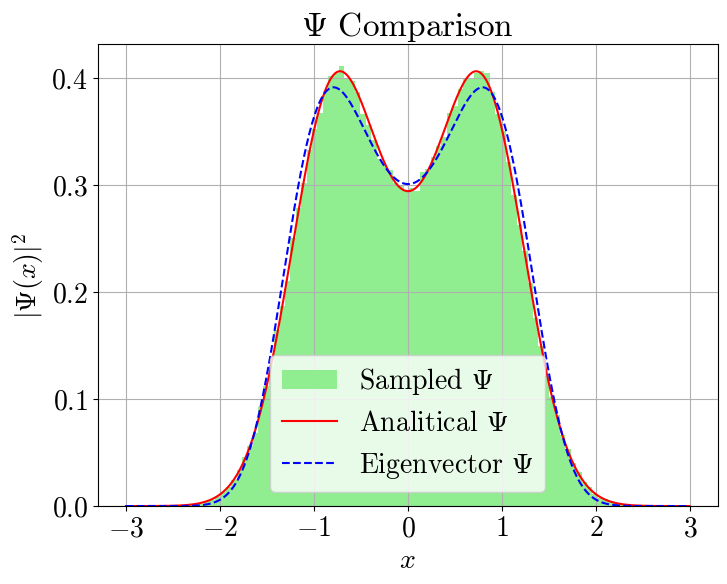

In [31]:
df = pd.read_csv('8.1/position_best.txt',sep='\t')
plt.hist(df["Posizione"],density=True,bins=100,color='lightgreen',label='Sampled $\Psi$')

m = 0.807166
s = 0.634228
plt.plot(p,wave(p,m,s),color='red',label='Analitical $\Psi$')
plt.plot(p,(psi[0])**2,color='blue',label='Eigenvector $\Psi$',linestyle='--')	
plt.legend(loc='lower center')
plt.title('$\Psi$ Comparison')
plt.xlabel('$x$')
plt.ylabel('$|\Psi(x)|^2$')
plt.grid()
plt.show()

### Codice
L'architettura di questa seconda parte eredita quanto fatto nella prima parte aggiungendo altri due attori: la classe `boltzmann` figlia di `funzione` e la classe `annealing` figlia di `datablocking`. Il risultato è un complesso gioco di dipendenze tra classi di tipo `metropolis`, `funzione` e `datablocking`. Oltre alle dipendenze già esplicitate nella prima parte si ha ora la classe `annealing` che possiede un data membro `metropolis& _metro` che ha come `funzione& distr` un elemento `boltzmann`. Quest'ultimo, dovendo valutare l'Energia $E_{(\sigma,\mu)}$ deve possedere a sua volta un data membro `energy` che permetta lo svolgimento di tale calcolo come implementato nell'Esercizio 8.1. Riporto la sezione del `main.cpp` che esplicita questa serie di dipendenze:
```cpp
    vec par = {1.,1.};                  // parametri sigma e mu inziali
    vec pos = {1.0};                    // posizione inziale di campionamento della funzione d'onda
    hat distr(1.,1.);                   // funzione d'onda inizializzata con sigma = mu = 1.

    metropolis metro(distr,type[0],"../../Librerie/Random Generator/");
    energy sys(L,O,1,1,type,metro,pos,false);
    boltzmann boltz(t,sys);
    metropolis bigM(boltz,type[0],"../../Librerie/Random Generator/");
    // ... 
    annealing null(T,step,4,2,div,prop,sys,bigM);

    null.blocks(true);
```
Anche in questo caso la parte corposa della simulazione è nascosto dentro l'operato di `blocks()` e riporto quindi il metodo `annealing::increase()`:
```cpp
vec annealing::increase(vec pos){
    for(int k=0;k<_nstep;k++){
        pos = _metro.move(pos);
        double ef = _metro.GetDistr().der(pos);
        if( ef <= _best){
            _best = ef;
            _min = pos;
        }
        blk_av(1) += ef;
    }
    blk_av(2) = pos(0) * _nstep;
    blk_av(3) = pos(1) * _nstep;
    return pos;
};
```
E il metodo `boltzmann::eval()`:
```cpp
double boltzmann::eval(vec a){
    _f.reset();
    _f.GetMetro().GetDistr().SetParams(a);
    _f.blocks(false);                       // eseguo data_blocking per \mu e \sigma fissati
    int blk = _f.N_blk();
    double e = _f.print(blk,0,false);       // estraggo il valore finale di E
    _en = e;
    _f.reset();                             // resetto il data_blocking
    return exp(-e/par(0));                  
    
};
```
Il comando `_metro.move(pos)` chiama in causa `metropolis bigM` che decide lo spostamento nello spazio dei pararmetri $(\sigma,\mu)=$`vec a` in base all'esito di `boltzmann::eval`. Quest'ultimo metodo invoca i metodi di data blocking del suo data-membro `energy& _f` arrivando ad una stima di $E_{(\sigma,\mu)}=$`e`.